# **STINTSY Machine Learning Project**

## Members ##

## **I. Overview**

### **Problem Statement**
 The dataset's **primary goal** is to understand and predict productivity performance by focusing on the output of teams involved in the garments manufacturing industry. Given the labor-intensive nature of the garment manufacturing industry and the numerous productivity factors that affect it, this dataset is useful for examining these aspects and forecasting productivity results.

### **Target Task**
  Since `actual_productivity`, the main feature of interest, is a continuous variable with a range of 0 to 1, a regression task would be suitable in this case, where we predict the `actual_productivity`.


## **II. Description of the dataset**



#### **Dataset Description**
The garment manufacturing industry gathers the garment dataset to assess teams' productivity. It records precise time data on day-to-day operations, team structures, and production rates. The manually compiled information, which industry professionals have verified, is intended to support productivity monitoring, analysis, and forecasting in the apparel manufacturing sector.

#### **Data Collection Process**
The dataset was **gathered by hand** and verified by professionals in the field. Although manual data collection suggests high dependability, it may also add biases or human error, which could affect the conclusions' precision and generalizability.

#### **Dataset Structure**
**Rows**: Every row represents a productivity instance for a particular team that manufactures garments on a certain day.
**Columns**: The dataset contains 15 columns, representing different attributes related to productivity.

#### **Dataset Composition**
**Number of Instances**: 1,197 observations.
**Number of Features**: 15 features in total, each capturing an aspect relevant to garment manufacturing productivity.

#### **Feature Descriptions**
* **date**: Date of the recorded instance in MM-DD-YYYY format.
* **quarter**: Month divided into four quarters.
* **department**: Department associated with the instance, either sewing or finishing.
* **day**: Day of the week for the recorded instance.
* **team**: Team number associated with the observation.
* **targeted_productivity:** Targeted productivity level set by authorities for each team per day.
* **smv (Standard Minute Value)**: Time allocated for specific tasks.
* **wip (Work in Progress)**: Count of unfinished items; has missing values.
* **over_time:** Overtime (in minutes) recorded for each team.
* **incentive**: Financial incentives provided to motivate productivity.
* **idle_time**: Time during which production was interrupted.
* **idle_men**: Number of workers idle due to interruptions.
* **no_of_style_change**: Count of style changes for the products.
* **no_of_workers**: Total workers in each team.
* **actual_productivity**: Actual productivity achieved, which ranges from 0 to slightly over 1.

## **III. List of Requirements**
List all the Python libraries and modules that you used.
* pandas
* sklearn
* numpy as np
* matplotlib
* seaborn

## **IV. Data preprocessing and cleaning**


### **Imports**

In [95]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import sklearn.preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### **Loading the Dataset** <br>


We will load the dataset using `pandas`

In [96]:
data = pd.read_csv('./garments.csv')

### **Overview of the Dataset** <br>


Let's examine sample values from each column to better understand the dataset. 

In [97]:
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


From the output above, the dataset contains a total of **13** features: **4** categorical features (`quarter`, `department`, `day`, and `team`) and **9** continuous features (`targeted_productivity`, `smv`, `wip`, `over_time`, `incentive`, `idle_time`, `idle_men`, `no_of_style_change`, and `no_of_workers`)

We can gain a better understanding of our dataset by reviewing general information about each column, including data types, non-null counts, and the presence of any missing values

In [98]:
print("\nDataset Information:")
display(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-nu

None

The dataset contains a total of **1,197** instances, with only one feature, `wip`, having missing values

### **Dropping of `date` feature**


As a first pre-processing step, we need to determine which features should we use in determining the actual_productivity of an instnace. Since the `quarter` and `day` columns already capture essential temporal features, hence, we will drop the `date` column. The `quarter` represents the broader time frame for each month while `day` provides granular weekly patterns.

In [99]:
data = data.drop('date', axis=1)
data

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


### **Checking for missing values** <br>


Earlier, we identified `wip` as the only feature with missing values. Let's validate this observation to confirm if it truly is the only one.

In [100]:
print("\nMissing Values in Each Column:")
display(data.isnull().sum())


Missing Values in Each Column:


quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

Since the `wip` variable has missing values and amounting to almost half the dataset, we will fill the missing rows

Let's first visualize the distribution of the `wip` feature. If the distribution is normal, we can fill the missing rows with the mean. If the distribution is skewed, we can fill it with the median of the column.

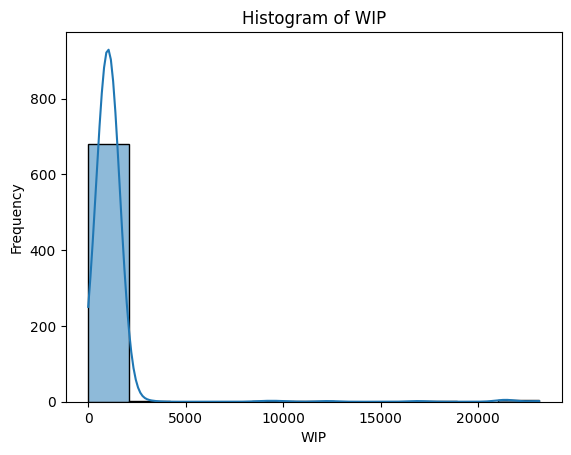

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['wip'], kde=True, bins=11)  
plt.title('Histogram of WIP')
plt.xlabel('WIP')
plt.ylabel('Frequency')
plt.show()


Given the skewness of the data, the median could be a suitable choice for filling missing values. However, in this dataset, `wip` represents 'work in progress,' and a missing value might indicate no unfinished work for that specific instance. Therefore, it would be more appropriate to fill the missing values with **0** instead.

In [102]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=0)
data['wip'] = imputer.fit_transform(data[['wip']])
data

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889


### **Checking for duplicate instances in our dataset**

We need to ensure that there are no redundant entries that could bias your analysis or model results. Let's check if we have any duplicates in our data and display these rows.

In [103]:
duplicate_rows = data.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

if duplicate_rows.sum() > 0:
    print("\nDuplicate Rows:")
    display(data[duplicate_rows])


Number of duplicate rows: 0


Since there are no duplicate data, we don't need to do anything for it

### **Handling Data Inconsistencies**

In [104]:
print(data['department'].unique())

['sweing' 'finishing ' 'finishing']


In the `department` column, our data is supposed to have either **sewing** or **finishing** only. However, the 'sewing' value has incorrect spelling, and there is an extra space in some 'finishing' values. Therefore, we need to handle them.

In [105]:
data['department'] = data['department'].replace('sweing', 'sewing')
data['department'] = data['department'].replace('finishing ', 'finishing')

# Display unique values to verify the change
print("Unique values in 'department' column after correction:")
print(data['department'].unique())

Unique values in 'department' column after correction:
['sewing' 'finishing']


### **Label Encoding**

Let's use `sklearn.preprocessing.LabelEncoder` to encode our labels of some of our features such as **quarter**, and **department**

Instantiate a LabelEncoder object.

In [106]:
label_encoder = sklearn.preprocessing.LabelEncoder()

Fit the `quarter` feature by calling the `fit()` function of the object.

In [107]:
label_encoder.fit(data['quarter'])

LabelEncoder()

Display the classes.

In [108]:
label_encoder.classes_

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

Thus, labels will be transformed from string values to their corresponding integer values:
- `Quarter 1` - `0`
- `Quarter 2` - `1`
- `Quarter 3` - `2`
- `Quarter 4` - `3`
- `Quarter 5` - `4`

Transform the `quarter` feature by calling the `transform()` function of the object.


In [109]:
data['quarter'] = label_encoder.transform(data['quarter'])
data

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,0,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,0,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,0,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,0,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333
1193,1,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1194,1,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1195,1,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889


Let's do the same for the `department`feature

The `department` labels will be transformed from string values to their corresponding integer values:

- `finishing` - `0`
- `sewing` - `1`

In [110]:
label_encoder.fit(data['department'])
data['department'] = label_encoder.transform(data['department'])
data


,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,1,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,0,0,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,0,1,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,0,1,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,0,1,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,0,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333
1193,1,0,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1194,1,0,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1195,1,0,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889


### **Ordinal Encoding**

To transform our feature `day` to numerical features, we will use ordinal encoding. We can create a dictionary that will map string values in the `day` feature to its corresponding integer value according to some order

- `Sunday` - `0`
- `Monday` - `1`
- `Tuesday` - `2`
- `Wednesday` - `3`
- `Thursday` - `4`
- `Friday` - `5`
- `Saturday` - `6`
- `Sunday` - `7`

In [111]:
data_day_dict = {
  'Sunday': 0,
  'Monday': 1,
  'Tuesday': 2,
  'Wednesday': 3,
  'Thursday': 4,
  'Friday': 5,
  'Saturday': 6,
  'Sunday': 7
}

We will use the `map()` function to transform the `day` feature to its correspomding ordinal value

In [112]:
data['day'] = data['day'].map(data_day_dict)
data

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,1,4,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,0,0,4,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,0,1,4,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,0,1,4,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,0,1,4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,0,3,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333
1193,1,0,3,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1194,1,0,3,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1195,1,0,3,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889


### **Changing of Data Types**


The `no_of_workers` column should contain whole numbers, as it represents a count of workers, and workers cannot be fractional. Therefore, we need to change its data type to integer.

Our approach is to truncate the decimal points to minimize the impact on the data, as rounding up could artificially inflate the worker count.

In [113]:
data['no_of_workers'] = data['no_of_workers'].apply(lambda x: int(x))

# Verify the change
print(data['no_of_workers'].head())
print("Data type after flooring:", data['no_of_workers'].dtype)


0    59
1     8
2    30
3    30
4    56
Name: no_of_workers, dtype: int64
Data type after flooring: int64


## **V. Exploratory Data Analysis**

This exploratory data analysis investigates the factors influencing the `actual_productivity` in the garments industry, examining relationships between productivity and variables such as team performance, work schedules, incentives, and operational disruptions, to uncover patterns and insights that drive productivity outcomes.

Let's display descriptive statistics to get an understanding of the distribution of each feature.

In [114]:
print(data.describe())

           quarter   department          day         team  \
count  1197.000000  1197.000000  1197.000000  1197.000000   
mean      1.399332     0.577277     3.812865     6.426901   
std       1.215535     0.494199     2.112252     3.463963   
min       0.000000     0.000000     1.000000     1.000000   
25%       0.000000     0.000000     2.000000     3.000000   
50%       1.000000     1.000000     3.000000     6.000000   
75%       2.000000     1.000000     6.000000     9.000000   
max       4.000000     1.000000     7.000000    12.000000   

       targeted_productivity          smv           wip     over_time  \
count            1197.000000  1197.000000   1197.000000   1197.000000   
mean                0.729632    15.062172    687.228070   4567.460317   
std                 0.097891    10.943219   1514.582341   3348.823563   
min                 0.070000     2.900000      0.000000      0.000000   
25%                 0.700000     3.940000      0.000000   1440.000000   
50%         

The consistent count of **1197** across all features indicates that there are no missing values in the dataset.

`quarter` has a mean of **1.4** which suggests that most records fall between quarter 1 and quarter 2

`department` averages **0.58** where valeus likely represent categories indicating a rougly even split between the two

`day` has a mean of **3.8**, pointing to a slight skew towards later days in the week if values range from 1 to 7.

`no_of_style_change`, `no_of_workers`, and `actual_productivity` have averages of **0.15**, **0.37**, and **0.735**, respectively, suggesting infrequent style changes, a relatively small average number of workers, and productivity that's usually around **73.5%** of the target.

Let's divide the columns to numerical and categorical to visualize a separate summary

In [115]:
data_cat = ['quarter', 'department', 'day', 'team']
data_num = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']

### Box Plot Distributions

Let's visualize the box plot for each numerical features to understand and identify possible outliers. 

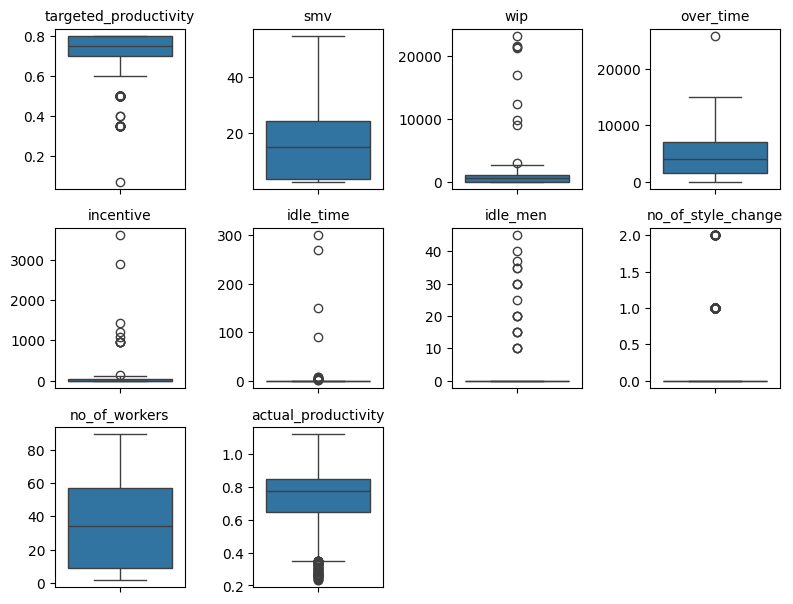

In [116]:
n_features = len(data_num)
cols = 4
row = (n_features + cols - 1) 

plt.figure(figsize=(cols * 2, row * 2))

for i, col in enumerate(data_num):
    plt.subplot(row, cols, i+1)
    sns.boxplot(y=data[col])
    plt.title(col, fontsize=10)
    plt.ylabel('')
    plt.xlabel('')

plt.tight_layout()
plt.show()

Each of the box plots shows the distribution of numerical features by capturing the minimum value, first quartile (Q1), median, third quartile (Q3), and the maximum value. We used box plots to identify variability and potential outliers in the dataset. In determining the outliers, the interquartile range (IQR) is important in defining the distribution of Q1 and Q3 combined. The outliers are determined by the circles in the box plot, which represent data points that fall outside 1.5 times the IQR.

The `targeted_productivity` feature shows its outliers predominantly at the lower value range. 50% of the data points are clustered at higher values, indicating skewness towards higher productivity scores. In contrast, we can also observe that the range of values for the actual productivity has higher similarities to the targeted productivity, suggesting most of the targeted productivity was achieved on different days.

Nonetheless, we can also observe that both features contain outliers, and they reside in the lower range. However, some outliers in the actual productivity are concentrated between the 0.2 and 0.4 range, reflecting slight deviations from the estimated values.

The `incentive`, `idle_time`, `idle_men`, and `no_of_style_change` are the numerical features that mainly consist of zero values. This indicates that these variables are sparse, as the majority of the data points are zero. Therefore, non-zero values are treated as outliers, as only a few of the data points contain non-zero values. In the `over_time` feature, although it has an outlier, it contains only a single outlier, suggesting an unusual deviation from the more frequent data points.

On the other hand, the `smv`, `wip`, and `no_of_workers` features exhibit no outliers, indicating that the distribution of these data points follows a predictable behavior.

Lastly, there is also an observation in the data points of `no_of_style_change`, where outliers take only two distinct values: 1.0 and 2.0. This limited range suggests that this feature may be better represented as a categorical variable rather than continuous values.

### Sparsed Features

Let's examine the sparsed features and their relevance to the target variable (`actual_productivity`). In the succeeding box plots, we visualize the distrubtion bewteen non-zero and zero values of a sparsed feature with respect to the `actual_productivity`. The false category represents those values that are non-zeroes while true category represents those values that are zeroes. 

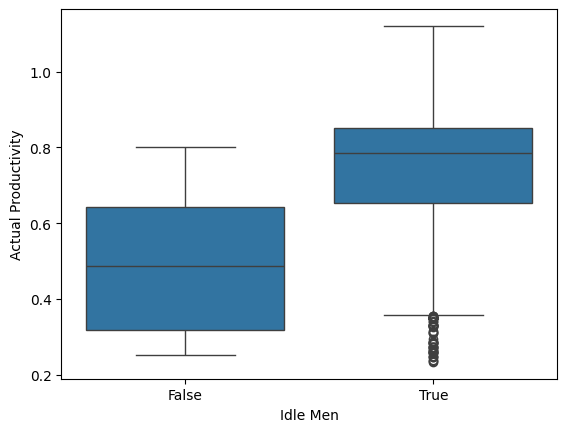

In [117]:
sns.boxplot(x=(data['idle_men'] == 0), y=data['actual_productivity'])
plt.xlabel('Idle Men')
plt.ylabel('Actual Productivity')
plt.show()

**False Category.**
The False Category box plot shows a more predictable behavior because it has no outliers. We can also observe that if we compare the Q1 and Q3 range between the True Category, it has a lower range. This indicates that when there are idle men, the actual productivity is lower in general than those without idle men. 

**True Category.** This box plot is highly similar to the box plot for all distributions in the `idle_men` feature. This is because most of the instances has 0 idle men. Although the actual productivity is higher than average than the False Category, it is also important to take note of the outliers. As we can observe, all outliers lies in the distribution where idle men is zero. Which indicates that despite having no idle men, we can still observe lower productivities. ***(What might causes this behavior?)***


To give evidence whether this feature is indeed relevant to the target variable, let's perform a statistical testing. Since the `actual_productivity` is a continuous variable, we will perform a T-test. 

In [118]:
from scipy.stats import ttest_ind
zero_group = data[data['idle_men'] == 0]['actual_productivity']
non_zero_group = data[data['idle_men'] != 0]['actual_productivity']
stat, p = ttest_ind(zero_group, non_zero_group)
print(f'T-test p-value: {p}')

T-test p-value: 1.956382600679767e-09


By default, the confidence level is set to 95% indicating a threshold of 5% or 0.05. Therefore, since p-value < 0.05, we reject the null hypothesis and conclude that there is a significant difference between the zero and non-zero values with respect to the actual productivity. This means that the zero values in this sparsed feature is relevant to the target variable. 

A summary of distribution for each numerical features

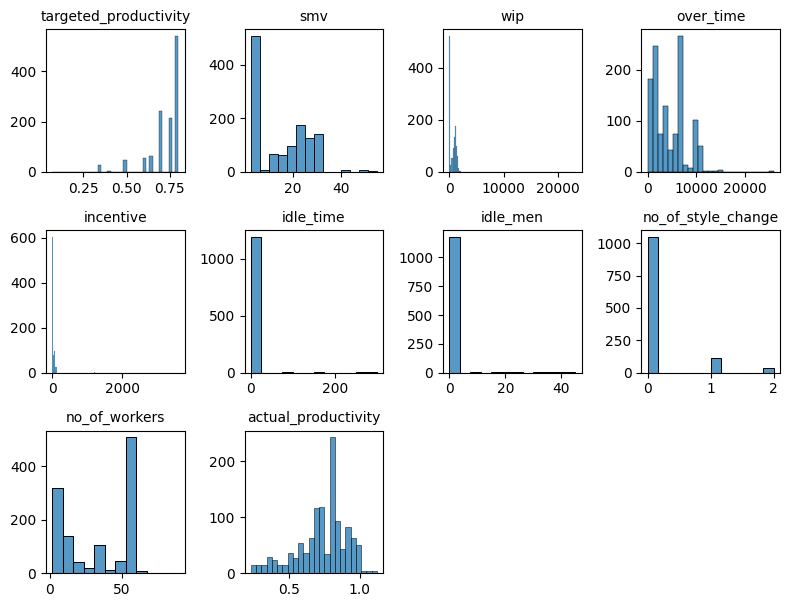

In [119]:
n_features = len(data_num)
cols = 4
row = (n_features + cols - 1) 

plt.figure(figsize=(cols * 2, row * 2))

for i, col in enumerate(data_num):
    plt.subplot(row, cols, i+1)
    sns.histplot(x=data[col])
    plt.title(col, fontsize=10)
    plt.ylabel('')
    plt.xlabel('')

plt.tight_layout()
plt.show()

### **Count Plots for Categorical Variables**

To gain a clearer understanding of our categorical variables, let's explore the distribution of each, including `quarter`, `department`, and `day`

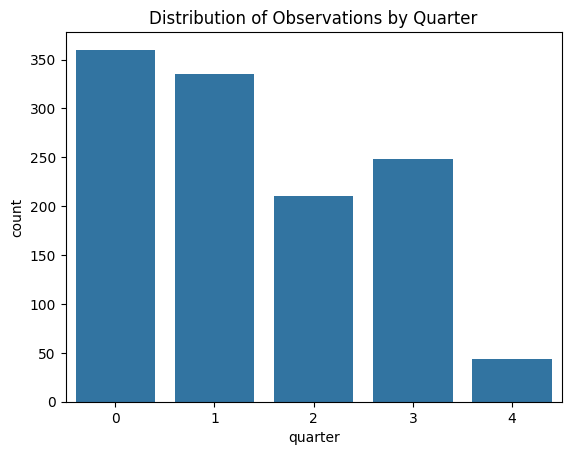

In [120]:
sns.countplot(data=data, x='quarter')
plt.title("Distribution of Observations by Quarter")
plt.show()

The visualization reveals that the majority of instances are concentrated in Quarter 1 and Quarter 2 of the month, indicating that most data points are from the first half of the month.

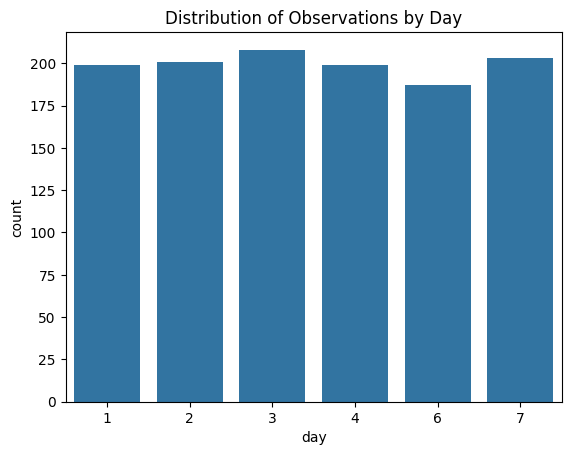

In [121]:
sns.countplot(data=data, x='day')
plt.title("Distribution of Observations by Day")
plt.show()

Using a numerical representation where 1 corresponds to **Sunday** and 7 corresponds to **Saturday**, this visualization illustrates that the distribution of instances is nearly uniform across the days of the week. However, there is a notable exception for **Fridays**, which show no recorded instances.

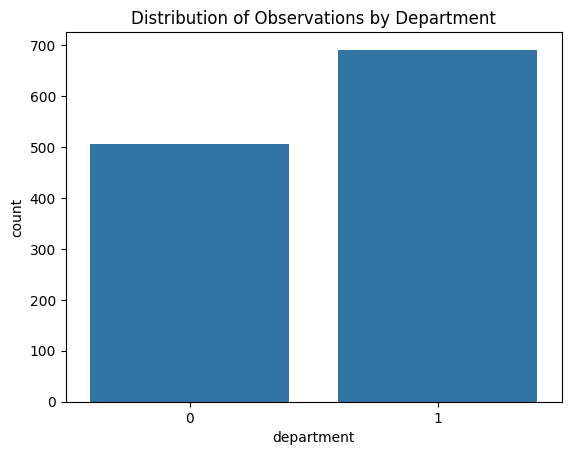

In [122]:
sns.countplot(data=data, x='department')
plt.title("Distribution of Observations by Department")
plt.show()

Lastly, the data indicates that there are significantly more instances in the `sewing` department compared to the `finishing` department.

### **Correlation between Variables**

We visualize the correlation between the variables to identify which ones to include as parameters for training our models. In this plot, lighter areas indicate stronger correlations, while darker areas indicate weaker correlations.

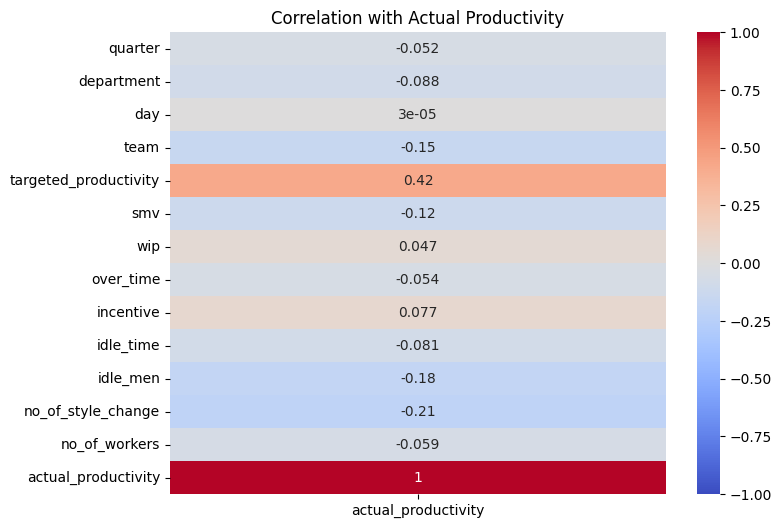

In [123]:
correlation_matrix = data.corr()
actual_productivity_corr = correlation_matrix[['actual_productivity']]

plt.figure(figsize=(8, 6))
sns.heatmap(actual_productivity_corr, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.title("Correlation with Actual Productivity")
plt.show()

Explanation HERE

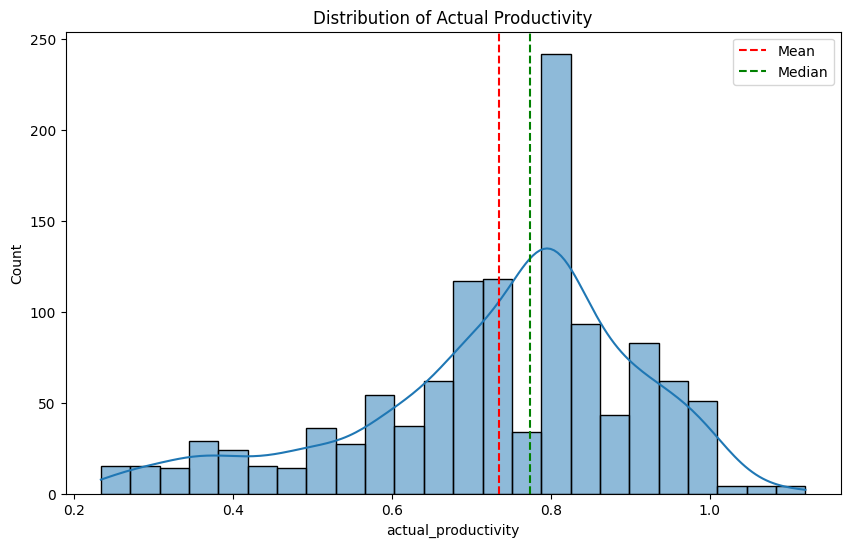

In [124]:
plt.figure(figsize=(10, 6))
sns.histplot(data['actual_productivity'], kde=True)
plt.title('Distribution of Actual Productivity')
plt.axvline(data['actual_productivity'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(data['actual_productivity'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.show()

This is the view of our data after preprocessing it before training the models. 

1. Distribution of Actual Productivity:
- Most teams operate at around 80% productivity (highest peak with 240 cases)
- Second most common is 65-70% productivity (about 120 cases)
- Very few teams achieve above 95% or below 40% productivity
- Average (mean) productivity is 75%
- Middle value (median) productivity is 80%

2. Findings:
- Normal Performance: 80% productivity is typical
- Room for Improvement: Many teams at 65-70% could potentially improve to 80%
- Exceptional Cases: Few teams reach over 90% productivity
- Poor Performance: Rare cases below 40% productivity need investigation

3. Recommendations:
- Use 80% as a realistic target for teams
- Focus on moving teams from 65-70% up to 80%
- Study what makes some teams achieve over 90%
- Investigate why some teams fall below 40%


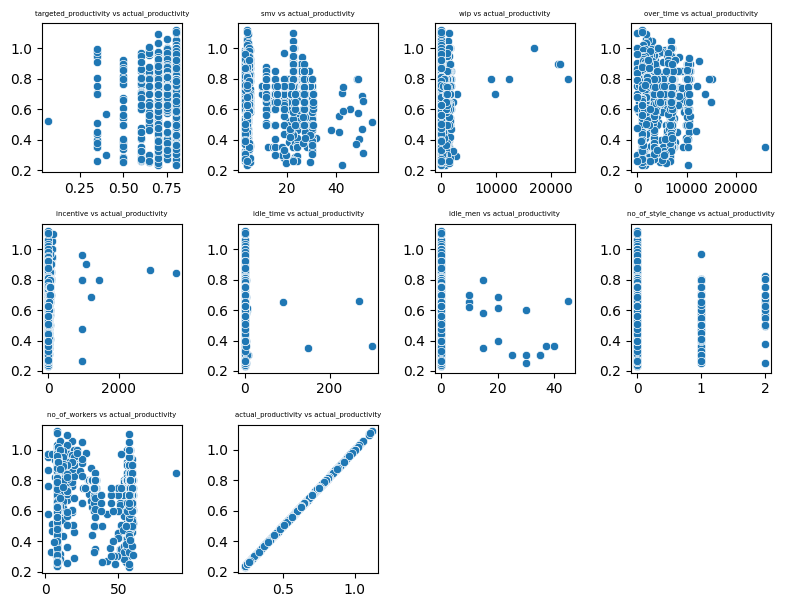

In [125]:
n_features = len(data_num)
cols = 4
row = (n_features + cols - 1) 

plt.figure(figsize=(cols * 2, row * 2))

for i, col in enumerate(data_num):
    plt.subplot(row, cols, i+1)
    sns.scatterplot(data=data, x=col, y='actual_productivity')
    plt.title(f"{col} vs actual_productivity", fontsize=5)
    plt.ylabel('')
    plt.xlabel('')

plt.tight_layout()
plt.show()

Explanation HERE

## **VI. Initial model training**

To address this task, we selected these machine learning models: Linear Regression, Decision Trees, and Neural Networks.

These models were chosen for their ability to complement each other, leveraging their unique strengths to provide a comprehensive analysis of the dataset's characteristics and predictive performance.

* Linear Regression serves as a baseline model. Its simplicity and interpretability allow us to assess whether linear relationships among features such as work in progress (WIP), overtime, and incentives are sufficient to accurately predict actual_productivity. This model helps establish a foundational understanding of the dataset's linear trends.

* Decision Trees are effective in handling both numerical and categorical data. With features like department, team number, and day of the week, Decision Trees can model non-linear relationships and interactions between variables. Additionally, they provide insights into feature importance, helping us identify the most critical factors affecting actual_productivity.

* Neural Networks are designed to capture complex, non-linear relationships. In this dataset, where factors like team size, incentives, and standard minute value (SMV) may interact in intricate ways, Neural Networks can uncover patterns that simpler models might miss. Their flexibility makes them particularly suited for datasets with diverse and interacting features, as seen here.

### **Splitting training and test set**

Let's separate the X features from the y labels of our dataset

In [126]:
X = data.values[:,0:-1]
X

array([[ 0.,  1.,  4., ...,  0.,  0., 59.],
       [ 0.,  0.,  4., ...,  0.,  0.,  8.],
       [ 0.,  1.,  4., ...,  0.,  0., 30.],
       ...,
       [ 1.,  0.,  3., ...,  0.,  0.,  8.],
       [ 1.,  0.,  3., ...,  0.,  0., 15.],
       [ 1.,  0.,  3., ...,  0.,  0.,  6.]])

In [127]:
X.shape

(1197, 13)

In [128]:
y = data.values[:,-1]
y

array([0.94072542, 0.8865    , 0.80057049, ..., 0.625625  , 0.50588889,
       0.39472222])

Let's separate the training from the test set. We'll set the test size to **0.2** and the `random_state` to **42**

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Linear Regression**

In [130]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression(fit_intercept=True)

In [131]:
lr_model.fit(X_train, y_train)

LinearRegression()

Predicting on Train Set

In [132]:
lr_train_pred = lr_model.predict(X_train)

In [133]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def compute_RMSE(y_true, y_pred):
    # TODO: Compute the Root Mean Squared Error
    rmse = np.sqrt( np.square(np.subtract(y_true, y_pred)).mean() )

    return rmse


def compute_R2_Score(y_true, y_pred):
    # Compute the mean of the true values
    mean_true = sum(y_true) / len(y_true)

    # Compute Total Sum of Squares
    tss = sum((yi - mean_true) ** 2 for yi in y_true)

    # Compute Residual Sum of Squares
    rss = sum((yi - yhat) ** 2 for yi, yhat in zip(y_true, y_pred))

    # Compute R-squared
    r2_score = 1 - rss / tss

    return r2_score

In [134]:
mae_lr_train = mean_absolute_error(y_train, lr_train_pred)
mse_lr_train = mean_squared_error(y_train, lr_train_pred)
rmse_lr_train = compute_RMSE(y_train, lr_train_pred)
r2_lr_train = r2_score(y_train, lr_train_pred)

print("LINEAR REGRESSION TRAIN SET PREDICTION")
print(f"Train Mean Absolute Error: {mae_lr_train}")
print(f"Train Mean Squared Error: {mse_lr_train}")
print(f"Train Root Mean Squared Error: {rmse_lr_train}")
print(f"Train R-squared: {r2_lr_train}")

LINEAR REGRESSION TRAIN SET PREDICTION
Train Mean Absolute Error: 0.10755588702688382
Train Mean Squared Error: 0.021966739062888273
Train Root Mean Squared Error: 0.14821180473527834
Train R-squared: 0.2994507612984785


Prediction on Test Set

In [135]:
lr_val_pred = lr_model.predict(X_test)

In [136]:
mae_lr = mean_absolute_error(y_test, lr_val_pred)
mse_lr = mean_squared_error(y_test, lr_val_pred)
rmse_lr = compute_RMSE(y_test, lr_val_pred)
r2_lr = r2_score(y_test, lr_val_pred)

print("LINEAR REGRESSION VALIDATION SET PREDICTION")
print(f"LR Mean Absolute Error: {mae_lr}")
print(f"LR Mean Squared Error: {mse_lr}")
print(f"LR Root Mean Squared Error: {rmse_lr}")
print(f"LR R-squared: {r2_lr}")

LINEAR REGRESSION VALIDATION SET PREDICTION
LR Mean Absolute Error: 0.10726058158170364
LR Mean Squared Error: 0.02142707561831188
LR Root Mean Squared Error: 0.1463799016884213
LR R-squared: 0.19302880584555437


### **Decision Trees**

### **Neural Networks**

## **VII. Error analysis**

We will use Neural Networks as our third model for their ability to capture complex, non-linear relationships in the data. Unlike traditional models like decision trees or linear regression, neural networks can learn intricate patterns and interactions between features, making them highly effective for tasks where the relationships are not easily modeled by simpler methods. Despite requiring more computational resources and careful tuning, neural networks offer strong potential for improving prediction accuracy in complex regression problems.

This is also worth using in this project as our thesis revolves around using neural networks

Instantiate a `Multi-Layer Perceptron (MLP) Regressor`

In [137]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(random_state=1, max_iter=500, hidden_layer_sizes=(100, 50), activation='relu', solver='adam', alpha=0.0001)


Train the model

In [138]:
nn.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=1)

Get the predicted values training set

In [139]:
ypredicted = nn.predict(X_train)

Compare the predicted values and the ground truth values

In [140]:
print('\nGround truth y values\n', y_train[0:5])
print('Predicted y values\n', y_predicted[0:5])


Ground truth y values
 [0.70050526 0.50459649 0.763375   1.09663333 0.80010714]
Predicted y values
 [0.48516552 0.79519014 0.65905055 0.67430601 0.65905055]


Get the score of training data

In [141]:
nn_train_score = nn.score(X_train, y_train)
nn_train_score

-1626.1380011065487

Get the predicted values of test set

In [142]:
y_predicted = nn.predict(X_test)

Compare the predicted values of the test set against the actual values

In [143]:
print('\nGround truth y values\n', y_test[0:5])
print('Predicted y values\n', y_predicted[0:5])


Ground truth y values
 [0.26821429 0.80035877 0.68106061 0.325      0.66760417]
Predicted y values
 [-3.5298136  -2.48965577  1.00872231  0.08730407  0.57244364]


Get the coefficient of determination of the test data

In [144]:
nn_test_score = nn.score(X_test, y_test)
nn_test_score

-969.3751332524578

We'll use decision trees as our second model as they are ideal for regression tasks because they can capture complex, non-linear relationships between features and the target variable. They handle both numerical and categorical data without requiring extensive preprocessing and are robust to outliers. Additionally, decision trees automatically select important features and offer easy interpretability, making them a flexible and transparent choice for modeling. Their ability to model interactions between variables without explicitly defining interaction terms further enhances their usefulness in regression tasks.

It is also worth comparing the performance of decision trees against Linear or Ridge Regression

Instantiate a `tree.DecisionTreeRegressor`

In [145]:
from sklearn import tree
tree = tree.DecisionTreeRegressor(max_depth=5, max_leaf_nodes=8, random_state=1)

We set the max_depth to **5** to limit the growth of the decision tree, preventing it from becoming overly complex and reducing the risk of overfitting. This ensures that the tree captures the most important patterns in the data without. Additionally, we imposed a limit of 8 leaf nodes to further control model complexity. By restricting the number of leaves, we encourage the model to generalize better, preventing it from memorizing the training data and improving its ability to perform on unseen data. These choices are aimed at striking a balance between model complexity and generalization.

Train the model

In [146]:
tree.fit(X_train, y_train) 

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=8, random_state=1)

Get the predicted values of the training set

In [147]:
y_predicted = tree.predict(X_train)

Get the R^2 score of the training data

In [148]:
tree_train_score = tree.score(X_train, y_train)
tree_train_score


0.348026757624334

Get the predicted values of the test set

In [149]:
y_predicted = tree.predict(X_test)

Get the R^2 score of the test data

In [150]:
tree_test_score = tree.score(X_test, y_test)
tree_test_score


0.30144354034396514

The R² value of **0.3489** on the training data indicates that the decision tree model explains **34.89%** of the variance in the target variable for the training set. The R² value of **0.3014** on the test data suggests that the model explains **30.14%** of the variance for the test set.

While the model performs decently on both datasets, the relatively small difference between the training and test R² values suggests that the model is not overfitting. However, the moderate R² values indicate that the decision tree is not capturing all the underlying patterns in the data. We need to tune our hyperparameters to get the best possible one and improve our model

## **VIII. Improving model performance**

### **Normalization** and **Standardization**


Since our target variable, `actual_productivity`, ranges from 0 to 1, it is essential to scale our features to ensure they are on a similar scale. This prevents features with larger ranges or magnitudes from dominating the model and improves its ability to learn effectively. We can achieve this by normalizing or standardizing the features.

Let's visualize the distribution of the feature `no_of_workers` using a histogram.

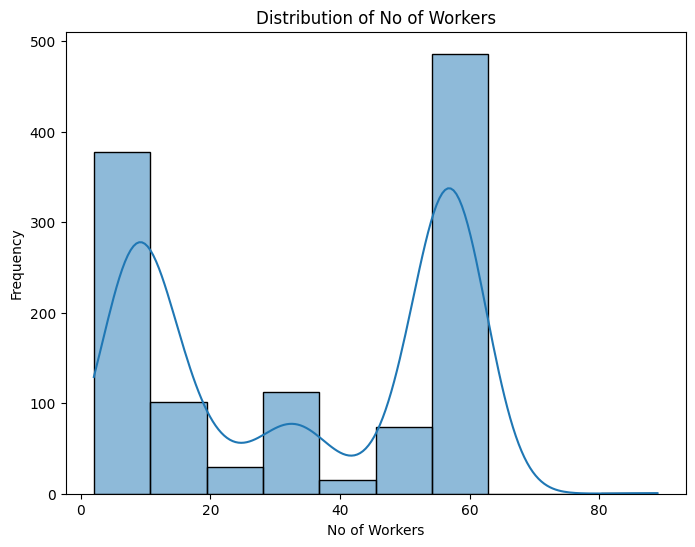

In [151]:
plt.figure(figsize=(8, 6))
sns.histplot(data['no_of_workers'], bins=10, kde=True)  
plt.title('Distribution of No of Workers')
plt.xlabel('No of Workers')
plt.ylabel('Frequency')
plt.show()

The distribution exhibits minimal to no outliers, making it suitable for normalization to scale the data within a consistent range. Let's normalize it using `MinMaxScaler()`

In [152]:
scaler = MinMaxScaler()
data['no_of_workers'] = scaler.fit_transform(data[['no_of_workers']])

Let's visualize the distribution of the `no_of_workers` again to verify the changes

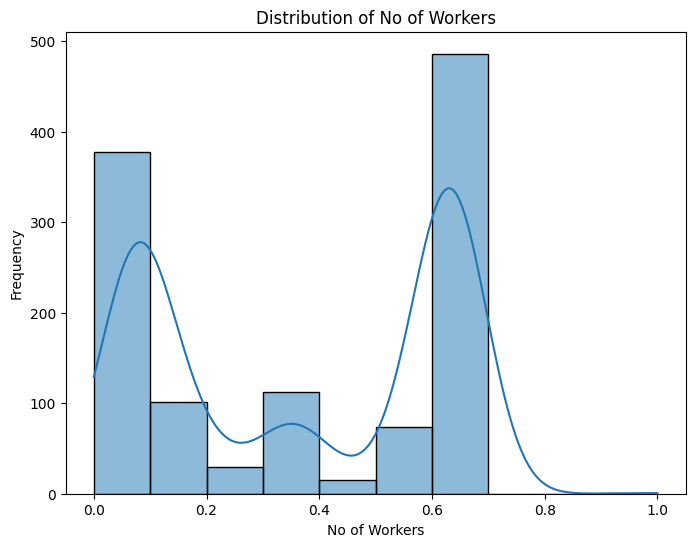

In [153]:
plt.figure(figsize=(8, 6))
sns.histplot(data['no_of_workers'], bins=10, kde=True)  
plt.title('Distribution of No of Workers')
plt.xlabel('No of Workers')
plt.ylabel('Frequency')
plt.show()

Now, the values of `no_of_workers` ranges from 0 to 1 after normalization

Let's visualize the distribution of the feature `smv` using a histogram.

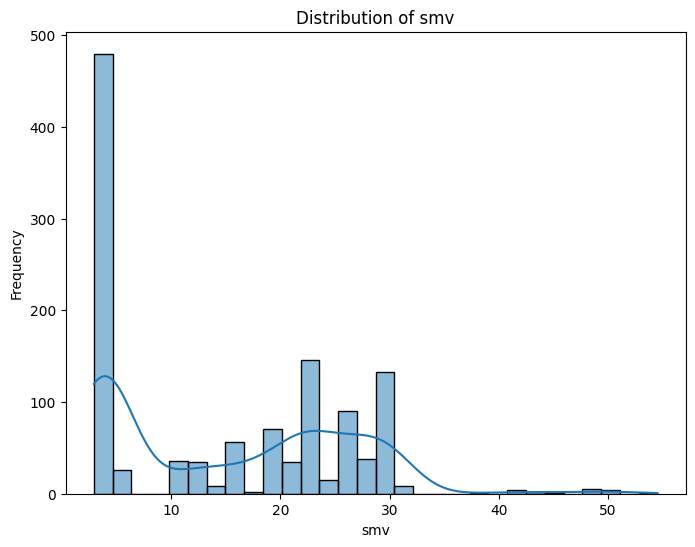

In [154]:
plt.figure(figsize=(8, 6))
sns.histplot(data['smv'], bins=30, kde=True) 
plt.title('Distribution of smv')
plt.xlabel('smv')
plt.ylabel('Frequency')
plt.show()

The distribution is left-skewed, indicating that the `smv` feature may benefit from standardization to center the data and improve its suitability for analysis. We'll standardize the feature using `StandardScaler()`

In [155]:
scaler = StandardScaler()
data['smv'] = scaler.fit_transform(data[['smv']])

Let's see the distribution again to verify the changes

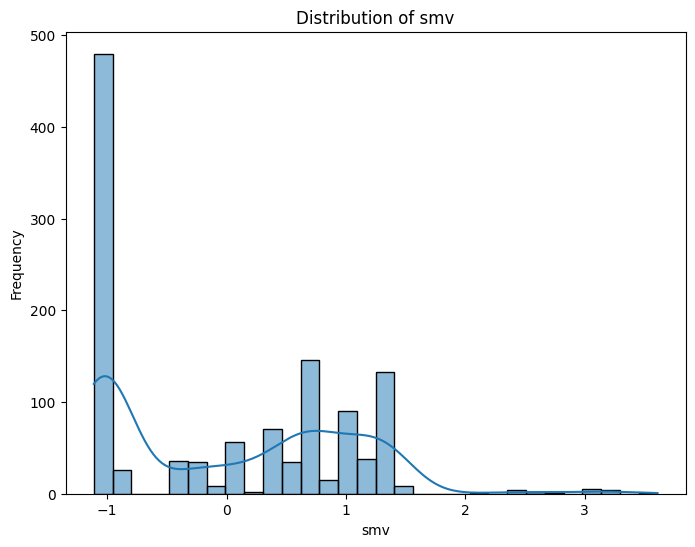

In [156]:
plt.figure(figsize=(8, 6))
sns.histplot(data['smv'], bins=30, kde=True) 
plt.title('Distribution of smv')
plt.xlabel('smv')
plt.ylabel('Frequency')
plt.show()

The distribution now falls within a range of -1 to 3, aligning more closely with the range of our target variable, `actual_productivity`

Now, let's visualize the distribution of the feature `over_time`

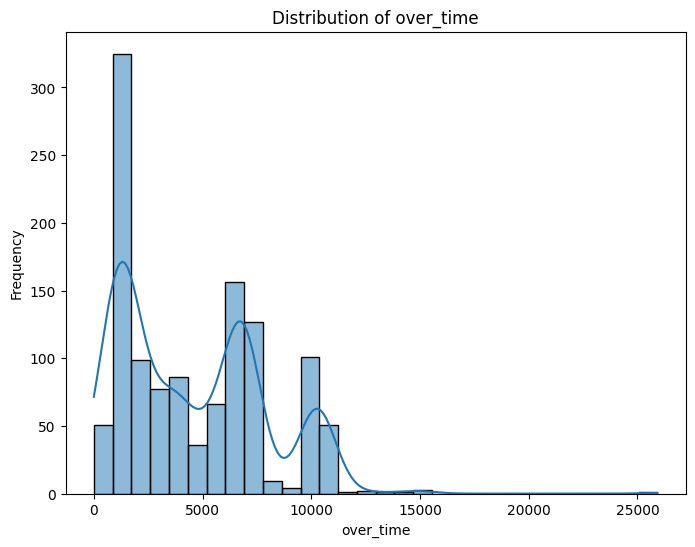

In [157]:
plt.figure(figsize=(8, 6))
sns.histplot(data['over_time'], bins=30, kde=True) 
plt.title('Distribution of over_time')
plt.xlabel('over_time')
plt.ylabel('Frequency')
plt.show()

The distribution is left-skewed with noticeable outliers, suggesting that this feature would benefit from standardization to mitigate skewness and improve its consistency for analysis.

In [158]:
scaler = StandardScaler()
data['over_time'] = scaler.fit_transform(data[['over_time']])

Let's visualize the changes by displaying the distribution again

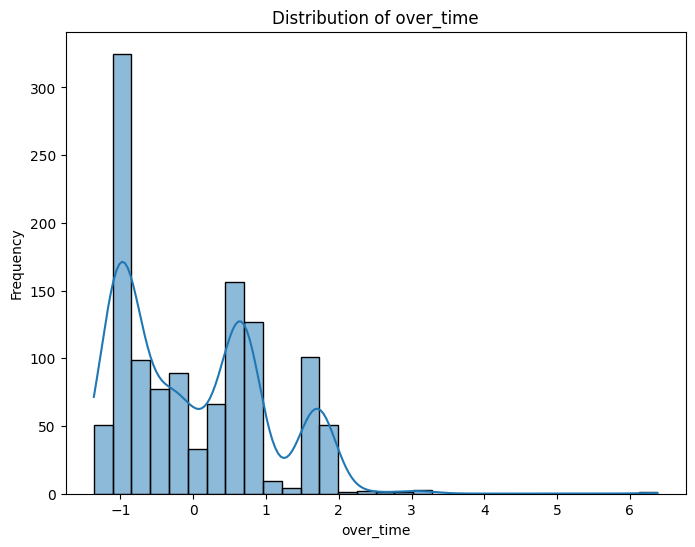

In [159]:
plt.figure(figsize=(8, 6))
sns.histplot(data['over_time'], bins=30, kde=True) 
plt.title('Distribution of over_time')
plt.xlabel('over_time')
plt.ylabel('Frequency')
plt.show()

By standardizing the data, we have reduced its scale, minimizing the impact of outliers on the analysis

Next, let's examine the distribution of the `wip` feature to analyze its characteristic

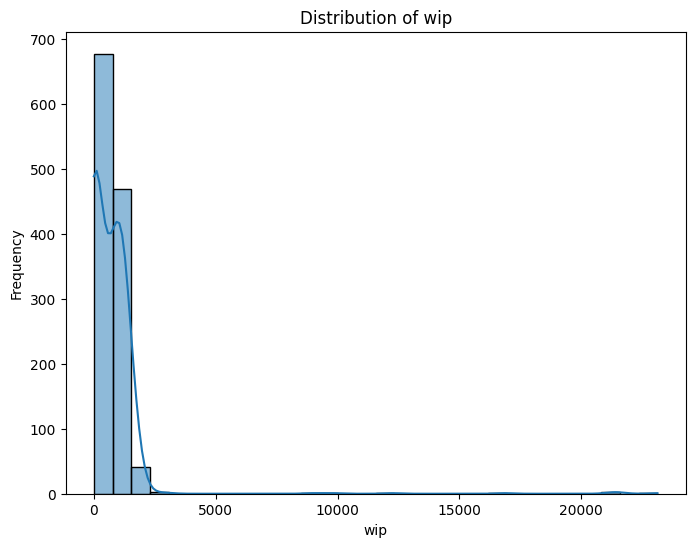

In [160]:
plt.figure(figsize=(8, 6))
sns.histplot(data['wip'], bins=30, kde=True)  
plt.title('Distribution of wip')
plt.xlabel('wip')
plt.ylabel('Frequency')
plt.show()

Let's see how skew the `wip` feature is to determine whether to apply log transformation.

In [161]:
from scipy.stats import skew

skewness = skew(data['wip'])
print(f"Skewness: {skewness}")


Skewness: 10.83878189712323


Since the skewness is greater than 1, the distribution of `wip` features is highly skewed. Therefore, we perform a log transformation to make the distribution more symmetric.

In [162]:
data['wip'] = np.log1p(data['wip'])

Since the `wip` feature exhibits left skewness and visible outliers in its distribution, we will apply standardization to normalize its scale and address these issues.

In [163]:
scaler = StandardScaler()
data['wip'] = scaler.fit_transform(data[['wip']])

Let's verify the changes through a histogram

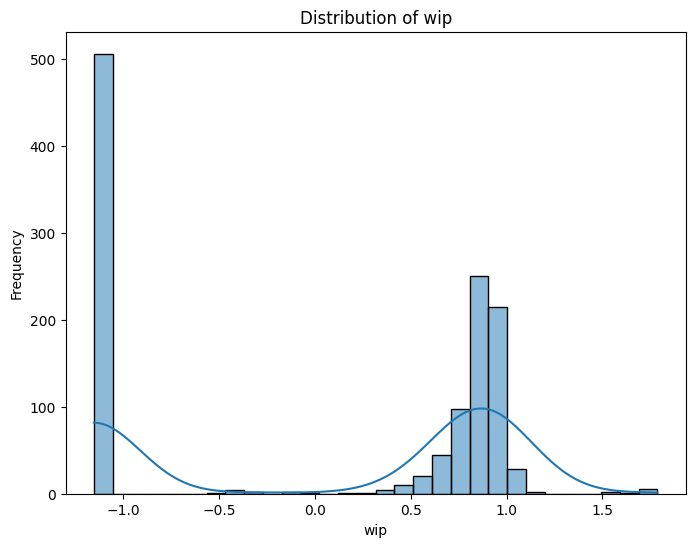

In [164]:
plt.figure(figsize=(8, 6))
sns.histplot(data['wip'], bins=30, kde=True)
plt.title('Distribution of wip')
plt.xlabel('wip')
plt.ylabel('Frequency')
plt.show()

The `wip` feature now ranges from -1 to 1.5 significantly decreasing its range and minimalizing the effects of outliers

Let's visualize the distribution of the feature `incentive`

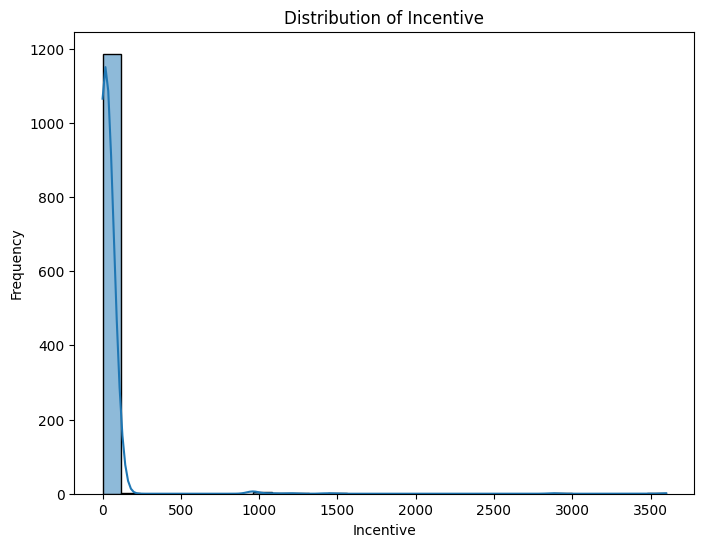

In [165]:
plt.figure(figsize=(8, 6))
sns.histplot(data['incentive'], bins=30, kde=True) 
plt.title('Distribution of Incentive')
plt.xlabel('Incentive')
plt.ylabel('Frequency')
plt.show()

The distribution of `incentive` is left-skewed, with most values clustered near **0** and a few outliers. Standardizing this feature could help normalize its distribution, making it more suitable for analysis and improving the performance of certain model

In [166]:
scaler = StandardScaler()
data['incentive'] = scaler.fit_transform(data[['incentive']])
data

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,1,4,8,0.80,1.014552,0.898610,0.750589,0.373414,0.0,0,0,0.655172,0.940725
1,0,0,4,1,0.75,-1.016778,-1.153867,-1.077682,-0.238643,0.0,0,0,0.068966,0.886500
2,0,1,4,11,0.80,-0.333878,0.859105,-0.271092,0.073631,0.0,0,0,0.321839,0.800570
3,0,1,4,12,0.80,-0.333878,0.859105,-0.271092,0.073631,0.0,0,0,0.321839,0.800570
4,0,1,4,6,0.80,0.990783,0.914535,-0.790895,0.073631,0.0,0,0,0.620690,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,0,3,10,0.75,-1.111853,-1.153867,-1.077682,-0.238643,0.0,0,0,0.068966,0.628333
1193,1,0,3,8,0.70,-1.020434,-1.153867,-1.077682,-0.238643,0.0,0,0,0.068966,0.625625
1194,1,0,3,7,0.65,-1.020434,-1.153867,-1.077682,-0.238643,0.0,0,0,0.068966,0.625625
1195,1,0,3,9,0.75,-1.111853,-1.153867,-0.826743,-0.238643,0.0,0,0,0.149425,0.505889


Let's see the changes by displaying the distribution again

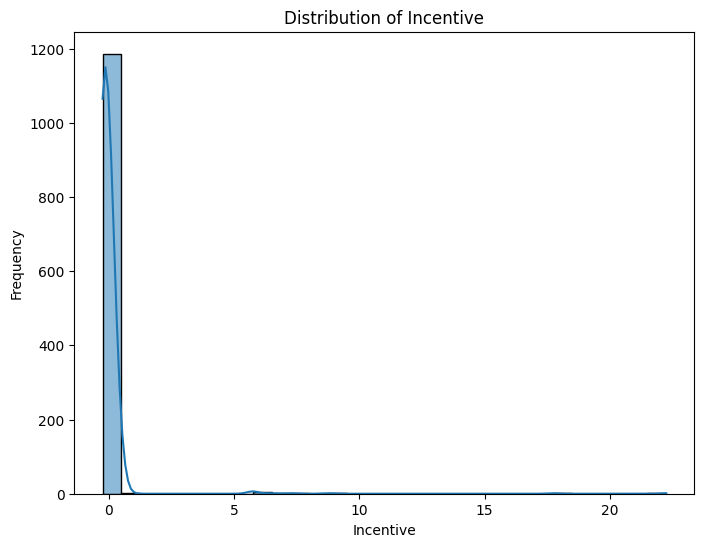

In [167]:
plt.figure(figsize=(8, 6))
sns.histplot(data['incentive'], bins=30, kde=True) 
plt.title('Distribution of Incentive')
plt.xlabel('Incentive')
plt.ylabel('Frequency')
plt.show()

As shown in the figure, we have reduced the large scale of the values and minimized the impact of outliers, aligning the feature's range more closely with that of our target variable, which ranges from 0 to 1.

Let's visualize the values of each of our columns after applying normalization and standardization

In [168]:
data

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,1,4,8,0.80,1.014552,0.898610,0.750589,0.373414,0.0,0,0,0.655172,0.940725
1,0,0,4,1,0.75,-1.016778,-1.153867,-1.077682,-0.238643,0.0,0,0,0.068966,0.886500
2,0,1,4,11,0.80,-0.333878,0.859105,-0.271092,0.073631,0.0,0,0,0.321839,0.800570
3,0,1,4,12,0.80,-0.333878,0.859105,-0.271092,0.073631,0.0,0,0,0.321839,0.800570
4,0,1,4,6,0.80,0.990783,0.914535,-0.790895,0.073631,0.0,0,0,0.620690,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,0,3,10,0.75,-1.111853,-1.153867,-1.077682,-0.238643,0.0,0,0,0.068966,0.628333
1193,1,0,3,8,0.70,-1.020434,-1.153867,-1.077682,-0.238643,0.0,0,0,0.068966,0.625625
1194,1,0,3,7,0.65,-1.020434,-1.153867,-1.077682,-0.238643,0.0,0,0,0.068966,0.625625
1195,1,0,3,9,0.75,-1.111853,-1.153867,-0.826743,-0.238643,0.0,0,0,0.149425,0.505889


This is the view of our data after preprocessing it before training the models. 

## **IX. Model performance summary**

## **X. Insights and conclusions**

## **XI. References**